In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy.ma as ma
import numpy
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from palettable import colorbrewer
import numpy as np


def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError( "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


In [2]:
adir_adcp = 'F:/data/cruise_data/saildrone/baja-2018/adcp_data/'
filename_adcp = adir_adcp + 'saildrone-gen_4-baja_2018-sd1002-adcp-20180411T175730-20180611T235730_300s-v1.nc'
ds_adcp=xr.open_dataset(filename_adcp)
ds_adcp.close()
ds_adcp = ds_adcp.isel(trajectory=0)
ds_adcp=ds_adcp.swap_dims({'obs':'time'})
print(ds_adcp)
time_offset_to_lmt=(ds_adcp.longitude/360.)*24.*60
tlmt= ds_adcp.time.data+time_offset_to_lmt*np.timedelta64(1,'m')# dt.timedelta(seconds=1)
ds_adcp['tlmt']=tlmt

<xarray.Dataset>
Dimensions:              (beam: 4, cell: 50, time: 8760)
Coordinates:
    trajectory           float32 9.96921e+36
  * time                 (time) datetime64[ns] 2018-04-11T19:50:00 ... 2018-06-11T20:10:00
Dimensions without coordinates: beam, cell
Data variables:
    cell_depth           (cell) float32 ...
    latitude             (time) float64 ...
    longitude            (time) float64 ...
    roll                 (time) float64 ...
    pitch                (time) float64 ...
    heading              (time) float64 ...
    nav_end_latitude     (time) float64 ...
    nav_end_longitude    (time) float64 ...
    nav_end_time         (time) datetime64[ns] ...
    nav_start_latitude   (time) float64 ...
    nav_start_longitude  (time) float64 ...
    nav_start_time       (time) datetime64[ns] ...
    bt_vel_east          (time) float64 ...
    bt_vel_north         (time) float64 ...
    bt_vel_up            (time) float64 ...
    percent_good         (time, cell) float6

In [3]:
adir='F:/data/cruise_data/saildrone/baja-2018/'
#adir='C:/Users/gentemann/Desktop/data/'
fname=adir+'saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-10_minutes-v1_withloggers_matchedadcp_v3.nc'
#fname=adir+'saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1_with_loggers.nc'
ds=xr.open_dataset(fname)
ds.close()
ds = ds.isel(obs=slice(0,8674))
ds=ds.swap_dims({'obs':'time'})
lons_usv=ds.longitude
lats_usv=ds.latitude
time_usv=ds.time
xlon = ds.longitude
ds.sea_water_temperature_logger1_mean


<xarray.DataArray 'sea_water_temperature_logger1_mean' (time: 8674)>
array([13.827553, 13.722967, 13.804357, ..., 18.7206  , 18.760433, 18.747167])
Coordinates:
    trajectory  float32 ...
  * time        (time) datetime64[ns] 2018-04-11T19:50:00 ... 2018-06-11T05:50:00
Attributes:
    long_name:                  sea surface depth temperature at 0.295 m
    standard_name:              sea_water_temperature
    installed_height:           -0.295 m
    serial_number:              SBE05608196
    model_number:               56
    sensor_description:         Seabird 56 Temperature Logger
    model_name:                 SBE 56
    product_page:               http://www.seabird.com/sbe56-temperature-logger
    nominal_sampling_schedule:  1 minute averages from :54 to :06 seconds
    units:                      degrees_C
    valid_min:                  -10.0
    valid_max:                  50.0

In [6]:
print('IMMA expecting m/s:', ds.UWND_MEAN.units)
print('IMMA expecting K', ds.TEMP_CTD_MEAN.units)


IMMA expecting m/s: m s-1
IMMA expecting K degrees_c


In [14]:
ds = xr.open_dataset('F:/data/cruise_data/saildrone/2019_arctic/daily_files//saildrone-gen_5-Arctic-MISST-2019-sd1036-20190514T000000-20190514T235959-1_minutes-v1.1557880328015.nc')
ds = ds.rename({'latitude':'lat'})
ds.lat.size

348

In [4]:
#calculate local time
time_offset_to_lmt=(xlon/360.)*24.*60
tlmt= ds.time.data+time_offset_to_lmt*np.timedelta64(1,'m')# dt.timedelta(seconds=1)
ds['tlmt']=tlmt

In [5]:
z=[-0.295,-0.6,-0.985,-1.42,-1.785]
i1save=[12800,35800,46000,61400,62080]
i2save=[13300,36300,46700,62080,63400]
file_str=['p1','p2','p3','p4','p5','p6','p7']
ilen=len(i1save)
ilen_ave=ds.sea_water_temperature_logger1_mean.size
tdata=np.ones([ilen_ave,5])
for i in range(0,ilen_ave):
    tdata[i,0]=ds.sea_water_temperature_logger1_mean[i]-ds.sea_water_temperature_logger4_mean[i]
    tdata[i,1]=ds.TEMP_CTD_MEAN[i]-(ds.sea_water_temperature_logger4_mean[i]) #-273.15)
    tdata[i,2]=ds.sea_water_temperature_logger2_mean[i]-ds.sea_water_temperature_logger4_mean[i]
    tdata[i,3]=ds.sea_water_temperature_logger3_mean[i]-ds.sea_water_temperature_logger4_mean[i]
    tdata[i,4]=ds.sea_water_temperature_logger4_mean[i]-ds.sea_water_temperature_logger4_mean[i]
#create xarray structure
profiles = xr.DataArray(tdata, coords={'time': ds.time,'depth':z}, dims=('time','depth'))
profiles_lmt = xr.DataArray(ds.tlmt, name='tlmt',coords={'time': ds.time}, dims=('time'))

In [6]:
#print(profiles_lmt)
print(profiles_lmt[0].data,profiles.time[0].data)

2018-04-11T11:40:00.000000000 2018-04-11T19:50:00.000000000


In [12]:
ds.BARO_PRES_MEAN


<xarray.DataArray 'BARO_PRES_MEAN' (time: 8674)>
array([1017.652, 1017.974, 1018.276, ...,      nan,      nan,      nan])
Coordinates:
    trajectory  float32 ...
  * time        (time) datetime64[ns] 2018-04-11T19:50:00 ... 2018-06-11T05:50:00
Attributes:
    standard_name:              air_pressure
    long_name:                  Air pressure
    units:                      hPa
    last_calibrated:            2016-10-06
    update_period:              1000
    model_product_page:         http://www.vaisala.com/en/products/pressure/P...
    device_name:                Vaisala Barometer (M4030149)
    installed_date:             2017-06-21T00:00:00Z
    nominal_sampling_schedule:  60s on, 240s off, centered at :00
    installed_height:           0.3
    serial_number:              M4030149
    vendor_name:                Vaisala
    model_name:                 PTB210

In [8]:
ds_adcp

<xarray.Dataset>
Dimensions:              (beam: 4, cell: 50, time: 8760)
Coordinates:
    trajectory           float32 9.96921e+36
  * time                 (time) datetime64[ns] 2018-04-11T19:50:00 ... 2018-06-11T20:10:00
Dimensions without coordinates: beam, cell
Data variables:
    cell_depth           (cell) float32 4.2 6.2 8.2 10.2 ... 98.2 100.2 102.2
    latitude             (time) float64 ...
    longitude            (time) float64 -122.6 -122.6 -122.6 ... -122.3 -122.3
    roll                 (time) float64 ...
    pitch                (time) float64 ...
    heading              (time) float64 ...
    nav_end_latitude     (time) float64 ...
    nav_end_longitude    (time) float64 ...
    nav_end_time         (time) datetime64[ns] ...
    nav_start_latitude   (time) float64 ...
    nav_start_longitude  (time) float64 ...
    nav_start_time       (time) datetime64[ns] ...
    bt_vel_east          (time) float64 ...
    bt_vel_north         (time) float64 ...
    bt_vel_up      

5


C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


16.429986572265648 17.649987792968773
15.489984130859398 17.839990234375023
18.170007324218773 19.249993896484398
14.469995117187523 17.499993896484398
14.920007324218773 16.540002441406273


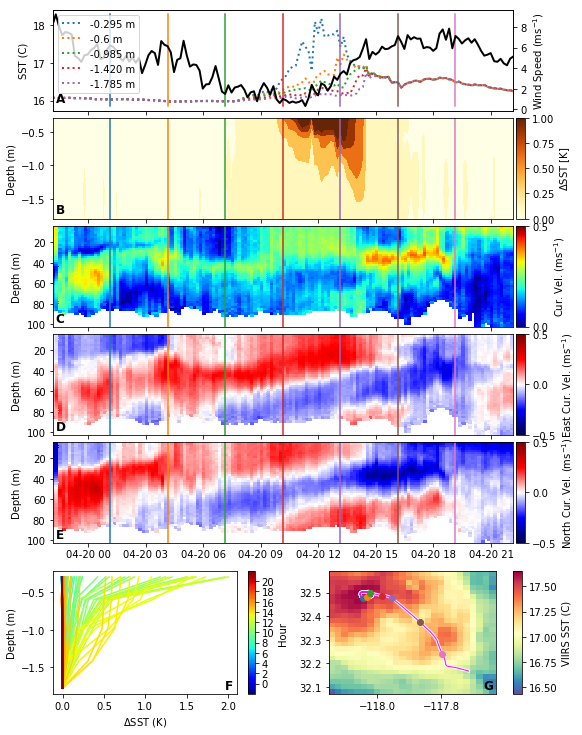

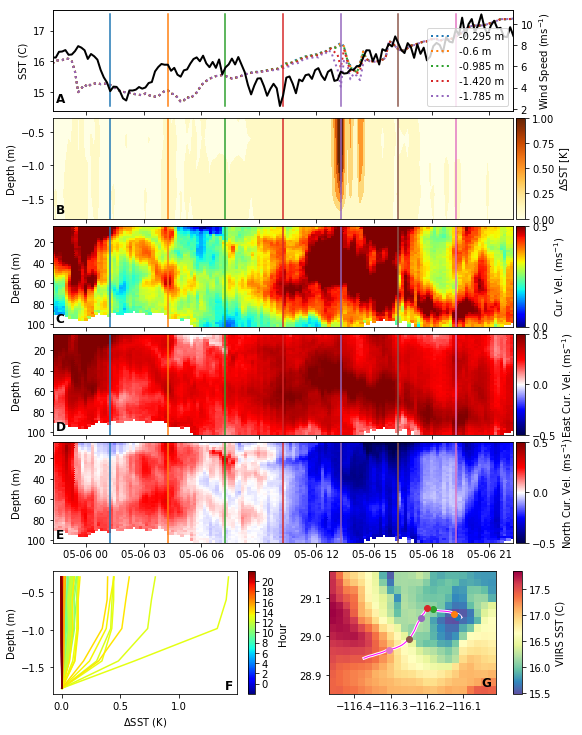

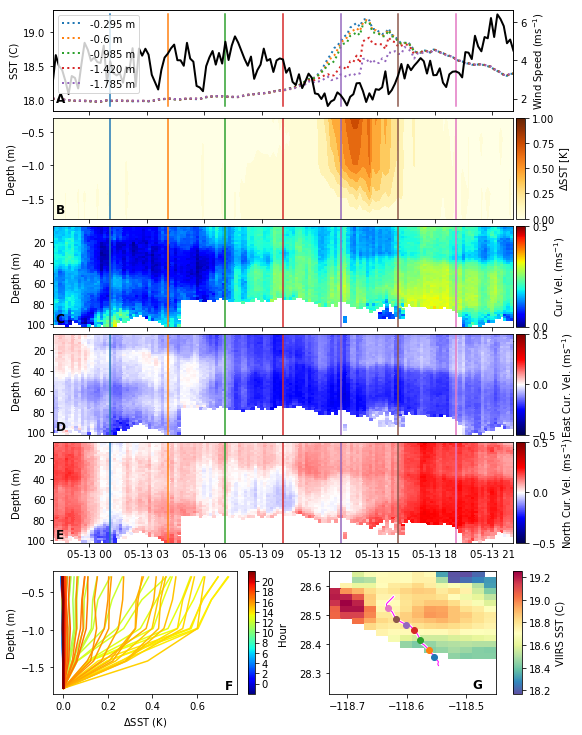

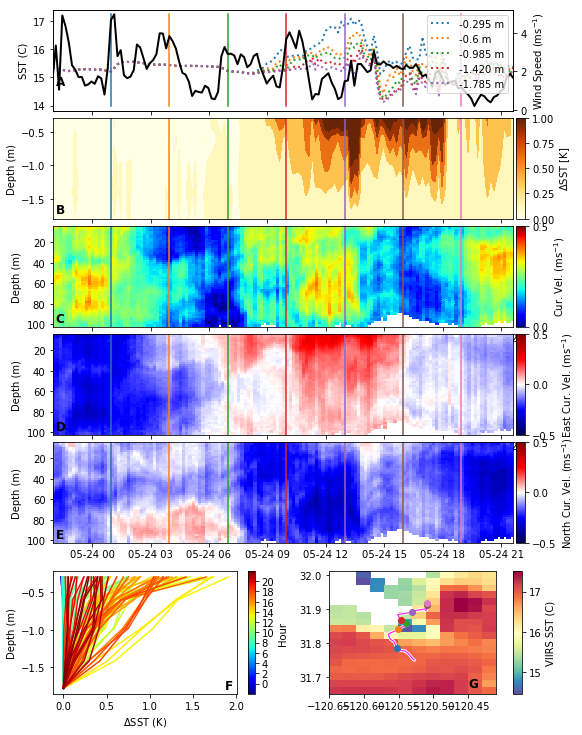

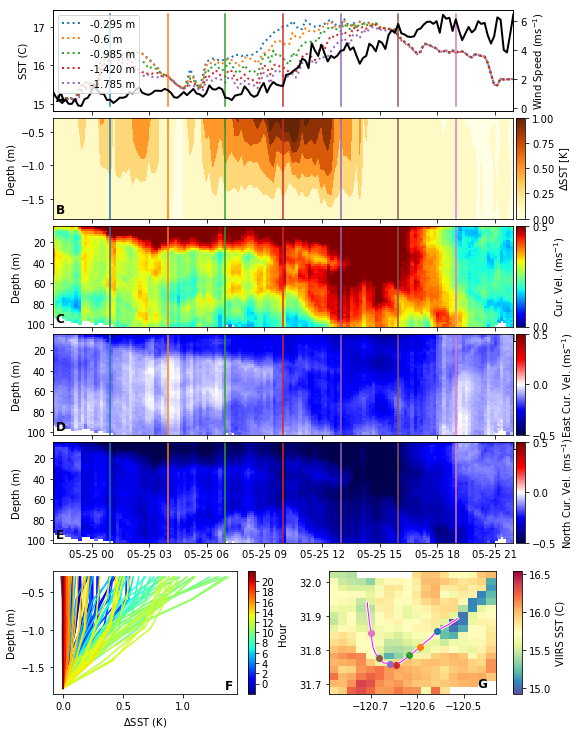

In [7]:
import matplotlib as mpl
from palettable import colorbrewer
import matplotlib.cm as cm
#make plots of times with diurnal warming
#add wind speed to figure
#i1save=[12800,35800,46000,61400,62000]
#i2save=[13300,36300,46700,62080,63400]
#i1save=[12800,35800,46000,61600,63080]
#i2save=[13300,36300,46700,63080,63800]
i1save=[np.datetime64('2018-04-20T06:00'),np.datetime64('2018-05-06T06:00'),np.datetime64('2018-05-13T06:00'),np.datetime64('2018-05-24T06:00'),np.datetime64('2018-05-25T06:00')]
i2save=[np.datetime64('2018-04-21T06:00'),np.datetime64('2018-05-07T06:00'),np.datetime64('2018-05-14T06:00'),np.datetime64('2018-05-25T06:00'),np.datetime64('2018-05-26T06:00')]
#i2save=[np.datetime64('2018-04-21'),np.datetime64('2018-05-07')]
                                                 

file_str=['p1','p2','p3','p4','p5','p6','p7']
ilen=len(i1save)
print(ilen)
for ii in range(0,ilen):
    i1=i1save[ii]
    i2=i2save[ii]

  #  t=tlmt.sel(time=slice(i1,i2)) #local time
  #  tem2=(t[0].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
  #  tem3=datetime.utcfromtimestamp(tem2)
  #  day_of_year = tem3.timetuple().tm_yday

    subset_adcp = ds_adcp.sel(time=slice(i1,i2))
    subset_adcp['vel_horiz']=np.sqrt(subset_adcp.vel_east**2+subset_adcp.vel_north**2)
    subset_adcp_masked = subset_adcp.where(subset_adcp.percent_good>10)      
    subset_usv = ds.sel(time=slice(i1,i2))
    
#    t=subset_usv.time
    t=subset_usv.tlmt
    s0=subset_usv.TEMP_CTD_MEAN.sel(time=slice(i1,i2))
    s1=subset_usv.sea_water_temperature_logger1_mean
    s2=subset_usv.sea_water_temperature_logger2_mean
    s3=subset_usv.sea_water_temperature_logger3_mean
    s4=subset_usv.sea_water_temperature_logger4_mean
    wnd=(subset_usv.UWND_MEAN**2+subset_usv.VWND_MEAN**2)**.5
    s0mask = np.isfinite(s0)
    s1mask = np.isfinite(s1)
    s2mask = np.isfinite(s2)
    s3mask = np.isfinite(s3)
    s4mask = np.isfinite(s4)
    wmask = np.isfinite(wnd)
    
    fig = plt.figure(figsize=(8,10))
#panel A    
    ax = fig.add_axes([0.1, 0.86, 0.8, 0.14])
    ax2 = ax.twinx()
    ax.plot_date(t[s1mask], s1[s1mask],':',markersize=.5,lw=2)
    ax.plot_date(t[s0mask], s0[s0mask],':',markersize=.5,lw=2)
    ax.plot_date(t[s2mask], s2[s2mask],':',markersize=.5,lw=2)
    ax.plot_date(t[s3mask], s3[s3mask],':',markersize=.5,lw=2)
    ax.plot_date(t[s4mask], s4[s4mask],':',markersize=.5,lw=2)       
    ax.set_prop_cycle(None)
    [y1,y2]=ax.get_ylim()
    [x1,x2]=ax.get_xlim()
    for ihr in range(3,24,3):
        tt=t[0]+np.timedelta64(ihr,'h')
        ax.plot([tt.data,tt.data],[y1,y2])
    ax2.plot_date(t[wmask], wnd[wmask],'k-',markersize=.5,lw=2)
    ax.set(ylabel='SST (C)',xticklabels='')
    ax2.set(ylabel='Wind Speed (ms$^{-1}$)')
    ax.set_xlim(t[0].data,t[-1].data)
    tem=str(ds.TEMP_CTD_MEAN.installed_height)+' m'
    leg = ax.legend([ds.sea_water_temperature_logger1_mean.installed_height,tem,ds.sea_water_temperature_logger2_mean.installed_height,ds.sea_water_temperature_logger3_mean.installed_height,ds.sea_water_temperature_logger4_mean.installed_height])
    leg.remove()
    ax2.add_artist(leg)
    ax.text(t[0].data+np.timedelta64(10,'m'),s1[s1mask].min().data,'A',size=12,weight='bold')
#panel B
    profile_subset = profiles.sel(time=slice(i1,i2))
    profile_subset_lmt = profiles_lmt.sel(time=slice(i1,i2))
    fig.gca().set_prop_cycle(None)
    ax = fig.add_axes([0.1, 0.71, 0.8, 0.14])   
    x = profile_subset_lmt.data
    y = profile_subset.depth
    X, Y = np.meshgrid(x, y)
    c = profile_subset.values.T
    s = ax.contourf(X, Y, c, 8, cmap=cm.YlOrBr, origin='lower', vmax=1, vmin=0)
        # rotate and align the tick labels so they look better
    ax.set(xticklabels='')
    ax.set_ylabel('Depth (m)')
    [y1,y2]=ax.get_ylim()
    for ihr in range(3,24,3):
        tt=t[0]+np.timedelta64(ihr,'h')
        ax.plot([tt.data,tt.data],[y1,y2])
    ax.text(t[0].data+np.timedelta64(10,'m'),-1.7,'B',size=12,weight='bold')
    m = plt.cm.ScalarMappable(cmap=cm.YlOrBr)
    m.set_array(c)
    m.set_clim(0., 1.)
    colorbar_ax = fig.add_axes([0.905, 0.71, 0.015, 0.14])
    fig.colorbar(m, cax=colorbar_ax,orientation='vertical',label='$\Delta$SST [K]',ticks=[0,.25,.5,.75,1])
#panel C
    ax = fig.add_axes([0.1, 0.56, 0.8, 0.14])
    ax0 = ax.pcolormesh(subset_adcp.tlmt,subset_adcp.cell_depth,subset_adcp_masked.vel_horiz.T,vmin=0,vmax=.5,cmap='jet')
    [y1,y2]=ax.get_ylim()
    for ihr in range(3,24,3):
        tt=t[0]+np.timedelta64(ihr,'h')
        ax.plot([tt.data,tt.data],[y1,y2])
    ax.set_ylabel('Depth (m)')
    ax.invert_yaxis()    
    ax.text(t[0].data+np.timedelta64(10,'m'),98,'C',size=12,weight='bold')   
    colorbar_ax = fig.add_axes([0.905, 0.56, 0.015, 0.14])
    fig.colorbar(ax0, cax=colorbar_ax,orientation='vertical',label='Cur. Vel. (ms$^{-1}$)',ticks=[0,.5,1])
#panel D
    ax = fig.add_axes([0.1, 0.41, 0.8, 0.14])
    ax0 = ax.pcolormesh(subset_adcp.tlmt,subset_adcp.cell_depth,subset_adcp_masked.vel_east.T,vmin=-.5,vmax=.5,cmap='seismic')
    [y1,y2]=ax.get_ylim()
    for ihr in range(3,24,3):
        tt=t[0]+np.timedelta64(ihr,'h')
        ax.plot([tt.data,tt.data],[y1,y2])
    ax.set_ylabel('Depth (m)')
    ax.invert_yaxis()    
    ax.text(t[0].data+np.timedelta64(10,'m'),98,'D',size=12,weight='bold')   
    colorbar_ax = fig.add_axes([0.905, 0.41, 0.015, 0.14])
    fig.colorbar(ax0, cax=colorbar_ax,orientation='vertical',label='East Cur. Vel. (ms$^{-1}$)',ticks=[-.5,0,.5])
#panel E
    ax = fig.add_axes([0.1, 0.26, 0.8, 0.14])
    ax0 = ax.pcolormesh(subset_adcp.tlmt,subset_adcp.cell_depth,subset_adcp_masked.vel_north.T,vmin=-.5,vmax=.5,cmap='seismic')
    [y1,y2]=ax.get_ylim()
    for ihr in range(3,24,3):
        tt=t[0]+np.timedelta64(ihr,'h')
        ax.plot([tt.data,tt.data],[y1,y2])
    ax.set_ylabel('Depth (m)')
    ax.invert_yaxis()    
    ax.text(t[0].data+np.timedelta64(10,'m'),98,'E',size=12,weight='bold')   
    colorbar_ax = fig.add_axes([0.905, 0.26, 0.015, 0.14])
    fig.colorbar(ax0, cax=colorbar_ax,orientation='vertical',label='North Cur. Vel. (ms$^{-1}$)',ticks=[-.5,0,.5])
#panel F
    ax2 = fig.add_axes([.1, 0.05, 0.4, 0.17])
    ilen_profile = profile_subset.shape[0]
    colors = plt.cm.jet(np.linspace(0,1,ilen_profile))
    for i in range(0,ilen_profile):
        ax0= plt.plot(profile_subset[i,:].values,z,color=colors[i])
    norm = mpl.colors.Normalize(vmin=-2,vmax=22)
#    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=False).mpl_colormap
    sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=norm)
    sm.set_array([])
    plt.colorbar(sm,boundaries=np.arange(-2,22,.1),label='Hour',ticks=[0,2,4,6,8,10,12,14,16,18,20])
    ax2.set_xlabel('$\Delta$SST (K)')
    ax2.set_ylabel('Depth (m)')
    [x1,x2] = ax2.get_xlim()
    [y1,y2] = ax2.get_xlim()
    ax2.text(x2-(x2-x1)/15,-1.8,'F',size=12,weight='bold')
#panel G
    tem2=(subset_usv.time[0].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
    tem3=datetime.utcfromtimestamp(tem2)
    day_of_year = tem3.timetuple().tm_yday   
    mn = xr.open_dataset(adir+'sat_data/virs_sst/all_sst'+str(day_of_year)+'.nc')
    mn.close()
    #calculate overpass with most values
    subset_mn = mn.sel(lon=slice(subset_usv.longitude.min().data,subset_usv.longitude.max().data),
                       lat=slice(subset_usv.latitude.max().data,subset_usv.latitude.min().data))
    s=np.zeros(subset_mn.dims['time'])
    for i in range(0,subset_mn.dims['time']):
        s[i]=(subset_mn.sea_surface_temperature[i,:,:]/subset_mn.sea_surface_temperature[i,:,:]).sum()
    imax = np.argmax(s)
    subset_mn = mn.sel(lon=slice(subset_usv.longitude.min().data-.1,subset_usv.longitude.max().data+.1),
                       lat=slice(subset_usv.latitude.max().data+.1,subset_usv.latitude.min().data-.1))
    subset_mn = subset_mn.isel(time=imax)
    #end calculate overpass with most values of sst

    minsst = subset_mn.sea_surface_temperature.min().data-273.15
    maxsst = subset_mn.sea_surface_temperature.max().data-273.15
    print(minsst,maxsst)
    #blue marble image of ssts for cruise
    ax4 = fig.add_axes([.58, 0.05, 0.29, 0.17])    
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
    ax0 = ax4.pcolormesh(subset_mn.lon,subset_mn.lat, subset_mn.sea_surface_temperature - 273.15, cmap=cmap, vmin = minsst, vmax = maxsst)
    ax4.plot(subset_usv.longitude.data,subset_usv.latitude.data,'w', linewidth=3)
    ax4.plot(subset_usv.longitude.data,subset_usv.latitude.data,color='magenta', linewidth=1)
    for ihr in range(3,24,3):
        tt=subset_usv.time[0]+np.timedelta64(ihr,'h')
        sub_lons = subset_usv.longitude.sel(time=tt,method='nearest')
        sub_lats = subset_usv.latitude.sel(time=tt,method='nearest')
        ax4.plot(sub_lons,sub_lats,'o')
    ax4.text(subset_mn.lon.max().data-.04,subset_mn.lat.min().data+.02,'G',size=12,weight='bold')
    colorbar_ax = fig.add_axes([0.9, 0.05, 0.015, 0.17])
    fig.colorbar(ax0, cax=colorbar_ax,orientation='vertical',label='VIIRS SST (C)')

    
    adir_fig='F:/data/cruise_data/saildrone/baja-2018/figs/diurnal/'
    fig.savefig(adir_fig+'temp_loggers__diurnal_adcp'+str(t[0].dt.dayofyear.data)+'4.png')
    

5


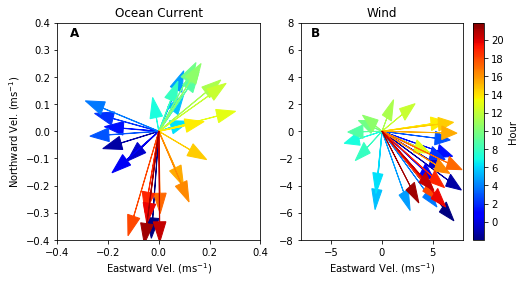

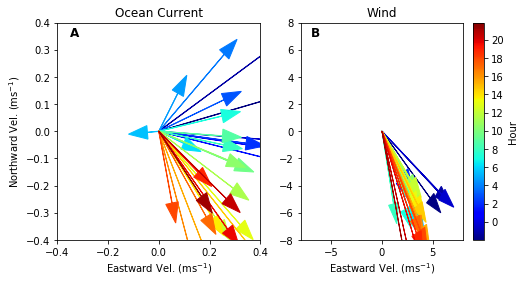

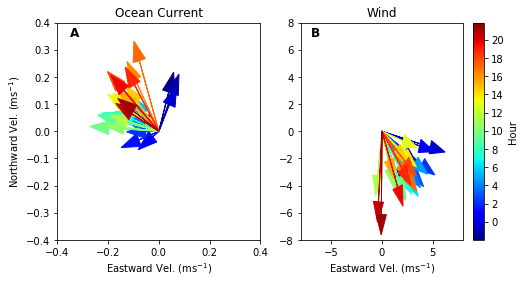

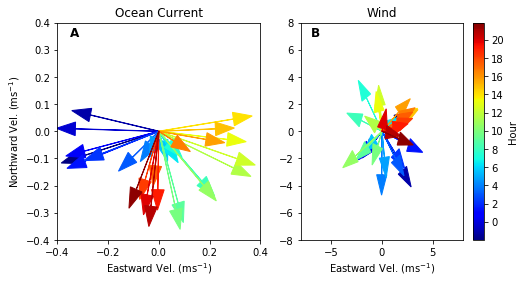

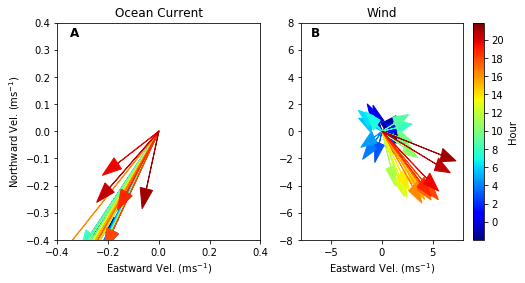

In [144]:
# plot velocity vectors
i1save=[np.datetime64('2018-04-20T06:00'),np.datetime64('2018-05-06T06:00'),np.datetime64('2018-05-13T06:00'),np.datetime64('2018-05-24T06:00'),np.datetime64('2018-05-25T06:00')]
i2save=[np.datetime64('2018-04-21T06:00'),np.datetime64('2018-05-07T06:00'),np.datetime64('2018-05-14T06:00'),np.datetime64('2018-05-25T06:00'),np.datetime64('2018-05-26T06:00')]                                               
file_str=['p1','p2','p3','p4','p5','p6','p7']
ilen=len(i1save)
print(ilen)
for ii in range(0,ilen):
    i1=i1save[ii]
    i2=i2save[ii]
    
    subset_adcp = ds_adcp.sel(time=slice(i1,i2))
    subset_adcp_masked = subset_adcp.where(subset_adcp.percent_good>10)      
    subset_usv = ds.sel(time=slice(i1,i2))
    profile_subset = profiles.sel(time=slice(i1,i2))
    profile_subset_lmt = profiles_lmt.sel(time=slice(i1,i2))
    t=subset_usv.tlmt
      
    fig = plt.figure(figsize=(8,4))
    ilen_profile = profile_subset.shape[0]
    colors = plt.cm.jet(np.linspace(0,1,ilen_profile))
    plt.subplot(121)
    for i in range(0,ilen_profile,5):
        plt.arrow(0,0,subset_adcp.vel_east[i,0],subset_adcp.vel_north[i,0],color=colors[i],head_width=.05)
    norm = mpl.colors.Normalize(vmin=-2,vmax=22)
    sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=norm)
    sm.set_array([])
    plt.xlim(-.4,.4)
    plt.ylim(-.4,.4)
    plt.title('Ocean Current')
    plt.xlabel('Eastward Vel. (ms$^{-1}$)')
    plt.ylabel('Northward Vel. (ms$^{-1}$)')
    plt.text(-.35,.35,'A',size=12,weight='bold')


    plt.subplot(122)
    for i in range(0,ilen_profile,5):
        plt.arrow(0,0,subset_usv.UWND_MEAN[i],subset_usv.VWND_MEAN[i],color=colors[i],head_width=1)
    norm = mpl.colors.Normalize(vmin=-2,vmax=22)
    sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=norm)
    sm.set_array([])
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.title('Wind')
    plt.xlabel('Eastward Vel. (ms$^{-1}$)')
    plt.text(-7,7,'B',size=12,weight='bold')
    ax = plt.colorbar(sm,boundaries=np.arange(-2,22,.1),label='Hour',ticks=[0,2,4,6,8,10,12,14,16,18,20])
    
    adir_fig='F:/data/cruise_data/saildrone/baja-2018/figs/diurnal/'
    fig.savefig(adir_fig+'rotation_adcp'+str(t[0].dt.dayofyear.data)+'4.png')
    

5


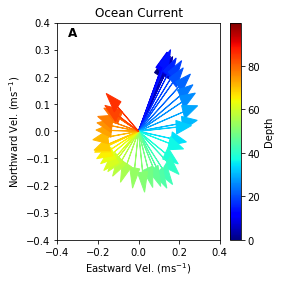

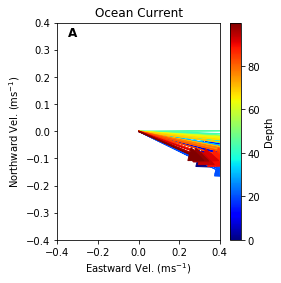

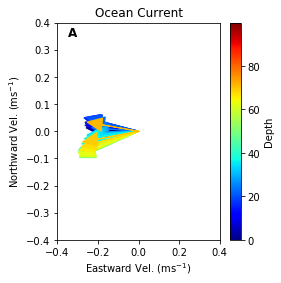

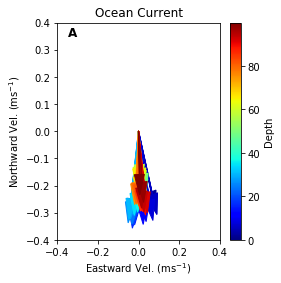

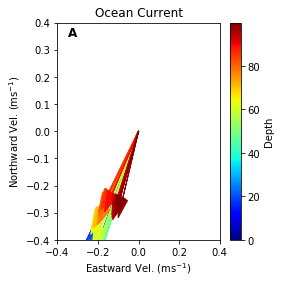

In [165]:
# plot velocity vectors
i1save=[np.datetime64('2018-04-20T06:00'),np.datetime64('2018-05-06T06:00'),np.datetime64('2018-05-13T06:00'),np.datetime64('2018-05-24T06:00'),np.datetime64('2018-05-25T06:00')]
i2save=[np.datetime64('2018-04-21T06:00'),np.datetime64('2018-05-07T06:00'),np.datetime64('2018-05-14T06:00'),np.datetime64('2018-05-25T06:00'),np.datetime64('2018-05-26T06:00')]                                               
file_str=['p1','p2','p3','p4','p5','p6','p7']
ilen=len(i1save)
print(ilen)
for ii in range(0,ilen):
    i1=i1save[ii]
    i2=i2save[ii]
    
    subset_adcp = ds_adcp.sel(time=slice(i1,i2))
    subset_adcp_masked = subset_adcp.where(subset_adcp.percent_good>10)      
    subset_usv = ds.sel(time=slice(i1,i2))
    profile_subset = profiles.sel(time=slice(i1,i2))
    profile_subset_lmt = profiles_lmt.sel(time=slice(i1,i2))
    t=subset_usv.tlmt
      
    fig = plt.figure(figsize=(8,4))
    ilen_profile = subset_adcp.cell.size
    colors = plt.cm.jet(np.linspace(0,1,ilen_profile))
    plt.subplot(121)
    for i in range(0,ilen_profile,1):
        plt.arrow(0,0,subset_adcp_masked.vel_east[72,i],subset_adcp_masked.vel_north[72,i],color=colors[i],head_width=.05)
    norm = mpl.colors.Normalize(vmin=0,vmax=100)
    sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=norm)
    sm.set_array([])
    plt.xlim(-.4,.4)
    plt.ylim(-.4,.4)
    plt.title('Ocean Current')
    plt.xlabel('Eastward Vel. (ms$^{-1}$)')
    plt.ylabel('Northward Vel. (ms$^{-1}$)')
    plt.text(-.35,.35,'A',size=12,weight='bold')
    ax = plt.colorbar(sm,boundaries=np.arange(0,100,.1),label='Depth',ticks=[0,20,40,60,80,100])
    
    adir_fig='F:/data/cruise_data/saildrone/baja-2018/figs/diurnal/'
    fig.savefig(adir_fig+'rotation_adcp_depth'+str(t[0].dt.dayofyear.data)+'4.png')
    

In [163]:
print(subset_adcp.time[72].data)
subset_adcp.cell_depth

2018-05-25T18:00:00.000000000


<xarray.DataArray 'cell_depth' (cell: 50)>
array([  4.2,   6.2,   8.2,  10.2,  12.2,  14.2,  16.2,  18.2,  20.2,  22.2,
        24.2,  26.2,  28.2,  30.2,  32.2,  34.2,  36.2,  38.2,  40.2,  42.2,
        44.2,  46.2,  48.2,  50.2,  52.2,  54.2,  56.2,  58.2,  60.2,  62.2,
        64.2,  66.2,  68.2,  70.2,  72.2,  74.2,  76.2,  78.2,  80.2,  82.2,
        84.2,  86.2,  88.2,  90.2,  92.2,  94.2,  96.2,  98.2, 100.2, 102.2],
      dtype=float32)
Coordinates:
    trajectory  float32 9.96921e+36
Dimensions without coordinates: cell
Attributes:
    sampling_description:  300s on, 300s off, centered at :00
    installed_height:      -0.25
    serial_number:         24428
    vendor_name:           Teledyne RDI
    model_name:            Teledyne Workhorse WHM300-I-UG1 ADCP
    calibration_date:      2017-02-03
    positive:              down
    valid_min:             4.2
    long_name:             Depth of ADCP Measurement
    standard_name:         depth
    units:                 m
    

In [42]:
#old sst plotting code that used basemap which was nice because it has nice land
#but lacks lat / lon so the zoomed in images didn't tell a lot without location
m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                                  llcrnrlon=min(subset_usv.longitude.data)-.05, llcrnrlat=min(subset_usv.latitude.data)-.05,
                urcrnrlon=max(subset_usv.longitude.data)+.05, urcrnrlat=max(subset_usv.latitude.data)+.05)
    m.bluemarble()
    #    m.fillcontinents(color='grey',lake_color='white')
    lon_grid, lat_grid = np.meshgrid(subset_mn.lon, subset_mn.lat)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, subset_mn.sea_surface_temperature - 273.15, cmap=cmap, vmin = minsst, vmax = maxsst)
    x,y = m(subset_usv.longitude.data,subset_usv.latitude.data)
    m.plot(x,y,'w', linewidth=3)
    m.plot(x,y,color='magenta', linewidth=1)
    for ihr in range(3,24,3):
        tt=subset_usv.time[0]+np.timedelta64(ihr,'h')
        sub_lons = subset_usv.longitude.sel(time=tt,method='nearest')
        sub_lats = subset_usv.latitude.sel(time=tt,method='nearest')
        x,y = m(sub_lons,sub_lats)
        m.plot(x,y,'o')
